| Problem | Formula|Search Domain|
|---      |----    |----|
|Kur1|${\text{Min}}={\begin{cases}f_{1}\left(x_1,x_2,....,x_n\right)=\sum_{i=1}^{n-1}-10exp^{-0.2\sqrt{x^2_{i}+x^2_{i+1}}}\\f_{2}\left(x_1,x_2,....,x_n\right)=\sum^{n}_{i=1}\|x_i\|^{0.8}+5sinx_i^3\\\end{cases}}$|$-5.05\leq{x_i}\leq{5}, i=1..n$|




In [195]:
import time 
import xlsxwriter
from pymoo.indicators.hv import Hypervolume
from pymoo.factory import get_performance_indicator
from pymoo.indicators.igd_plus import IGDPlus
import sys,os 
from PIL import Image               # to load images
from IPython.display import display # to display images
import pandas as pd 
import pandas as pd 
import numpy as np, os ,sys 
from matplotlib import pyplot as plt 
ref_point = None
pf = None
def calculate_hv(result):
    path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())),result['path'])
    F = np.loadtxt(path)
    metric = Hypervolume(nds=True,ref_point = ref_point,norm_ref_point=False)
    igd_plus = IGDPlus(pf,zero_to_one=False)
    start_time = time.time()
    hv = metric.do(F)
    igd_plus = igd_plus.do(F)
    exc_time = time.time() - start_time
    return [hv,igd_plus,exc_time]
def hv_result(result):
    get = result.apply(calculate_hv, axis=1)
    nadir_arr  = np.array([np.fromstring(i[1:-1],dtype=float, sep=' ') for i in np.array(result['approx_nadir'])])
    df = pd.DataFrame(get.tolist(), columns = ['hv','igd_plus','hv_exc_time'])
    final_result = pd.concat([result, df],axis=1)

    final_result.loc[:,'nadir_point'] =  list(nadir_arr)
    final_result.loc[:,'ref_point'] = str(ref_point)

    output_result = final_result[['Problem', 'Alg_name', 'Evaluations','Iteration', 
    'Objectives', 'n_variables','hv','igd_plus','pop_size','solutions_shape',
    'nadir_point','ref_point',
    'exec_time', 
    'hv_exc_time', 'path', 'image_location']]
    print(f'ref_point is {ref_point}')
    output_result = output_result.sort_values(['Alg_name','Evaluations','igd_plus','hv'],ascending =False).reset_index(drop=True)
    return output_result
cdir =os.getcwd()
pd.set_option('display.float_format', lambda x : "%.7f" % x)

# Kursawe problem 
## - (#variables / #objectives)
## - 2/2
## - 3/2
## - 4/2
## - 5/2
 - `#PBS -l ncpus=4,mem=16GB`
 - `#PBS -l walltime=10:00:00`
 - `#PBS -q normal`

## Parameter list 
- do for a in nsga2 nsga3 agnomen rnsga2 `algorithm list`
- do for n_gen in 100 200 500 1000    `iterations`
- do for pop in 40 100 200            `population size`

In [196]:

folder_2 = os.path.dirname(folder)
folder_2
pd.set_option('display.max_rows', None)
folder = os.path.dirname(os.getcwd())
filename = 'result_PI'
path = os.path.join(folder, filename)

result = pd.read_csv(path)

result = result.drop(columns=['xl','xu'])
result = result.loc[result['Problem']=='KUR1'].reset_index(drop=True)

print(f"The number of records {len(result)}")

The number of records 288


In [197]:
result.head(5)

,Problem,Alg_name,Iteration,Evaluations,Objectives,n_variables,exec_time,approx_nadir,solutions_shape,pop_size,path,image_location
0,KUR1,NSGA2,25,1000,2,2,0.1351199,[-7.21399656 0.07760128],40,40,Result/KUR1/NSGA2_KUR1_2/KUR1_NSGA2_Iteration-...,Result/Images/KUR1/NSGA2_KUR1Var-2/KUR1_NSGA2_...
1,KUR1,NSGA2,10,1000,2,2,0.1085289,[-7.17314677 0.11800718],52,100,Result/KUR1/NSGA2_KUR1_2/KUR1_NSGA2_Iteration-...,Result/Images/KUR1/NSGA2_KUR1Var-2/KUR1_NSGA2_...
2,KUR1,NSGA2,15,3000,2,2,0.2598591,[-7.23406214 0.00994068],200,200,Result/KUR1/NSGA2_KUR1_2/KUR1_NSGA2_Iteration-...,Result/Images/KUR1/NSGA2_KUR1Var-2/KUR1_NSGA2_...
3,KUR1,NSGA2,5,1000,2,2,0.0879028,[-7.13191189 0.2539242 ],31,200,Result/KUR1/NSGA2_KUR1_2/KUR1_NSGA2_Iteration-...,Result/Images/KUR1/NSGA2_KUR1Var-2/KUR1_NSGA2_...
4,KUR1,NSGA2,30,3000,2,2,0.2884407,[-7.21647846 0.01702803],100,100,Result/KUR1/NSGA2_KUR1_2/KUR1_NSGA2_Iteration-...,Result/Images/KUR1/NSGA2_KUR1Var-2/KUR1_NSGA2_...


In [198]:
#path and image path indicating location of objective file and visualization file
result.iloc[:,-2:].head(5)

,path,image_location
0,Result/KUR1/NSGA2_KUR1_2/KUR1_NSGA2_Iteration-...,Result/Images/KUR1/NSGA2_KUR1Var-2/KUR1_NSGA2_...
1,Result/KUR1/NSGA2_KUR1_2/KUR1_NSGA2_Iteration-...,Result/Images/KUR1/NSGA2_KUR1Var-2/KUR1_NSGA2_...
2,Result/KUR1/NSGA2_KUR1_2/KUR1_NSGA2_Iteration-...,Result/Images/KUR1/NSGA2_KUR1Var-2/KUR1_NSGA2_...
3,Result/KUR1/NSGA2_KUR1_2/KUR1_NSGA2_Iteration-...,Result/Images/KUR1/NSGA2_KUR1Var-2/KUR1_NSGA2_...
4,Result/KUR1/NSGA2_KUR1_2/KUR1_NSGA2_Iteration-...,Result/Images/KUR1/NSGA2_KUR1Var-2/KUR1_NSGA2_...


In [199]:
# filter kursawe problem based on number of variables
kur1_2 = result.loc[result['n_variables']==2].reset_index(drop=True) # dimension 2 
kur1_3 = result.loc[result['n_variables']==3].reset_index(drop=True) # dimension 3 
kur1_4 = result.loc[result['n_variables']==4].reset_index(drop=True) # dimension 4 
kur1_5 = result.loc[result['n_variables']==5].reset_index(drop=True) # dimension 5

# Kur1 with two variables

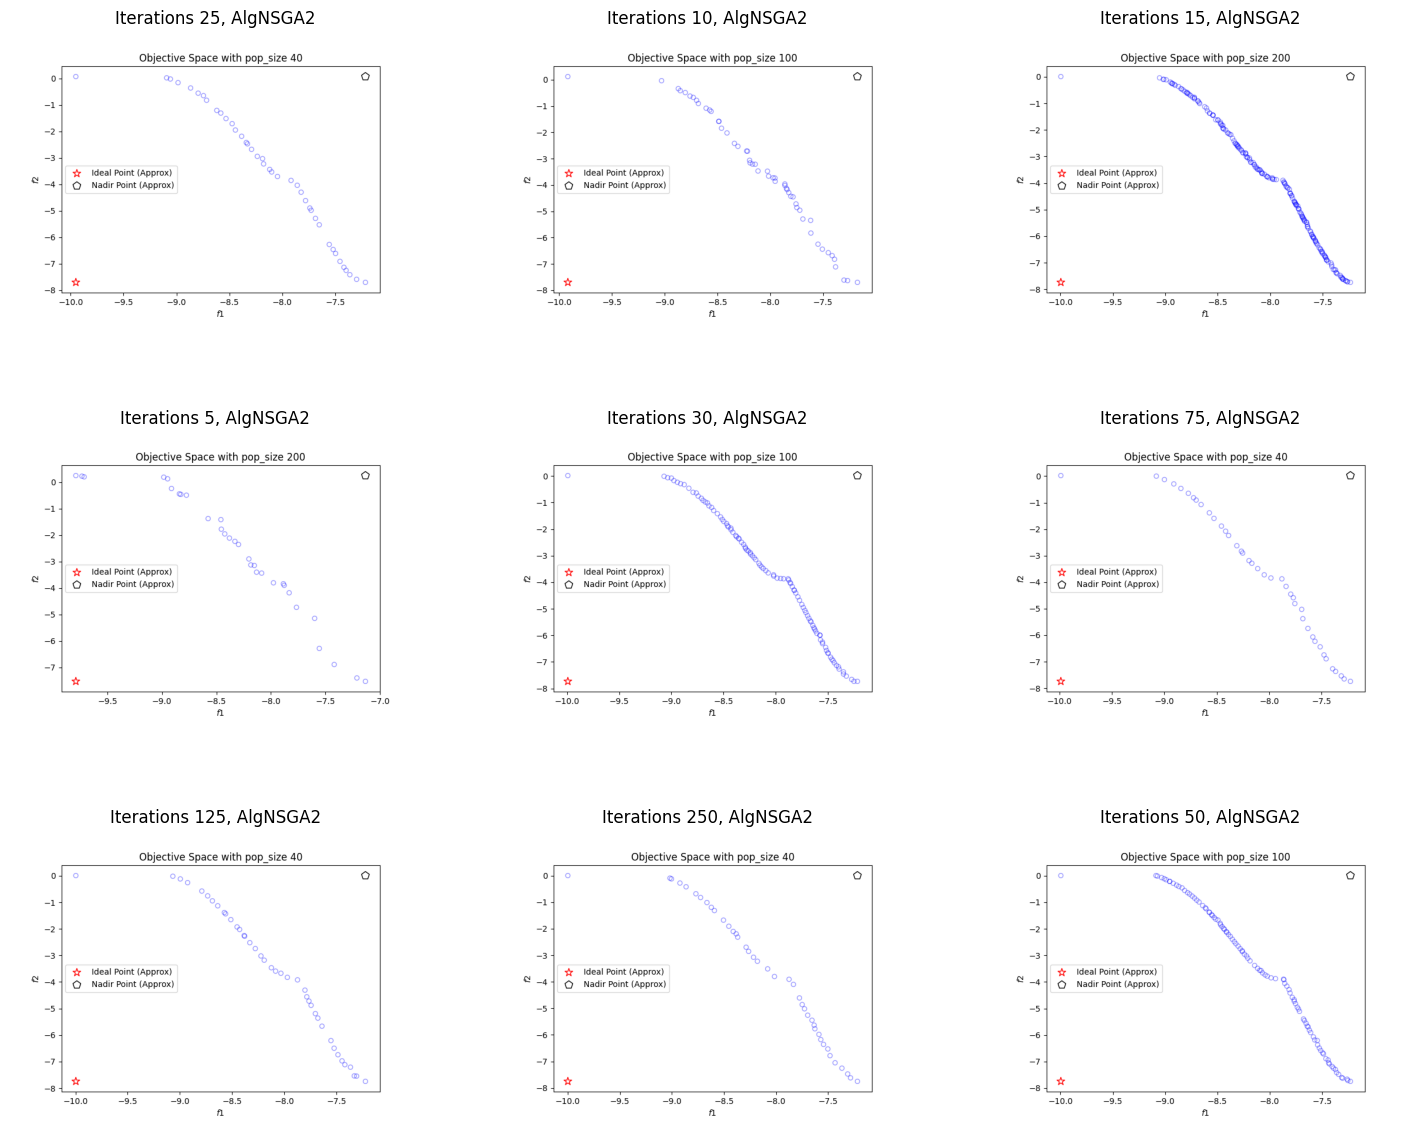

In [200]:
# more figures can be found here: Result/Images/KUR1/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(9):
    plt.subplot(3,3,i+1)
    f = kur1_2['image_location'][i]
    path = os.path.join(folder_2,f )+'.png'
    img = Image.open(path)
    plt.title(f'Iterations {kur1_2.Iteration[i]}, Alg{kur1_2.Alg_name[i]}')
    plt.axis('off')
    plt.imshow(img)

In [201]:
nadir_arr  = np.array([np.fromstring(i[1:-1],dtype=float, sep=' ') for i in np.array(kur1_2['approx_nadir'])])

print(f'Global nadir point for kur1 with two variables is :{np.round(np.max(nadir_arr, axis=0),2)}')

ref_point = np.array([-7  ,0])
pf = np.loadtxt(os.path.join(folder,'result_factory/Bench/kur1_2_pf' ))
kur1_2_table =hv_result(kur1_2)

#kur1_2_table

Global nadir point for kur1 with two variables is :[-6.75  0.44]
ref_point is [-7  0]


In [202]:
ref_point = np.array([-1, 5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/kur1_2_pf' ))
kur1_2_table_2 = hv_result(kur1_2)


ref_point is [-1  5]


In [203]:
pd.concat([kur1_2_table,kur1_2_table_2]).to_excel('Excel/kur1_2.xlsx', engine = 'xlsxwriter')

# Kur1 with three variables

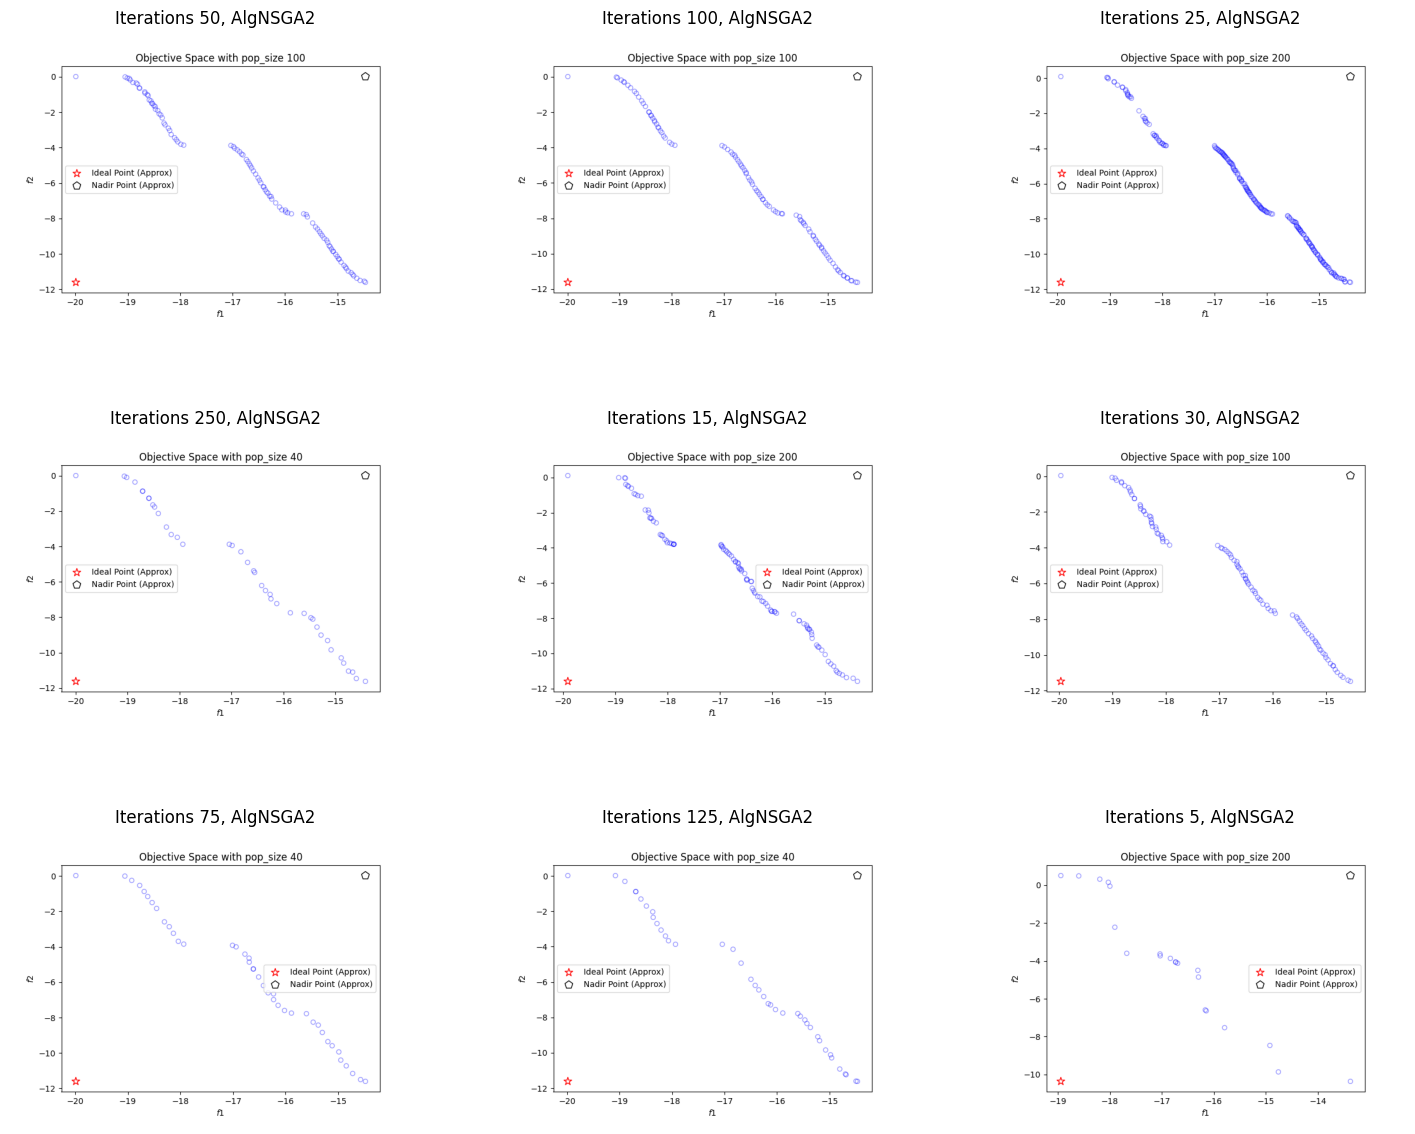

In [204]:
# more figures can be found here: Result/Images/KUR1/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(9):
    plt.subplot(3,3,i+1)
    f = kur1_3['image_location'][i]
    path = os.path.join(folder_2,f )+'.png'
    img = Image.open(path)
    plt.title(f'Iterations {kur1_3.Iteration[i]}, Alg{kur1_3.Alg_name[i]}')
    plt.axis('off')
    plt.imshow(img)

In [205]:
nadir_arr  = np.array([np.fromstring(i[1:-1], dtype=float, sep=' ') for i in np.array(kur1_3['approx_nadir'])])

print(f'Global nadir point for kur1 with two variables is :{np.round(np.max(nadir_arr, axis=0),2)}')

ref_point = np.array([-13,1]) #check figure 
pf = np.loadtxt(os.path.join(cdir, 'Bench/kur1_3_pf' ))
kur1_3_table =hv_result(kur1_3)
kur1_3_table

Global nadir point for kur1 with two variables is :[-13.37   1.15]
ref_point is [-13   1]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,hv,igd_plus,pop_size,solutions_shape,nadir_point,ref_point,exec_time,hv_exc_time,path,image_location
0,KUR1,RNSGA2,50000000,1000000,2,3,37.5133035,0.5152601,50,50,"[-14.43546358, -3.38795555]",[-13 1],9725.7649732,0.0056131,Result/KUR1/RNSGA2_KUR1_3/KUR1_RNSGA2_Iteratio...,Result/Images/KUR1/RNSGA2_KUR1Var-3/KUR1_RNSGA...
1,KUR1,RNSGA2,10000000,200000,2,3,26.2261226,1.2039296,50,50,"[-14.43546358, -9.6256163]",[-13 1],1936.8301518,0.0056369,Result/KUR1/RNSGA2_KUR1_3/KUR1_RNSGA2_Iteratio...,Result/Images/KUR1/RNSGA2_KUR1Var-3/KUR1_RNSGA...
2,KUR1,RNSGA2,50000,1250,2,3,28.1578505,1.0945679,40,40,"[-14.43546451, -8.48796487]",[-13 1],10.1880164,0.0045671,Result/KUR1/RNSGA2_KUR1_3/KUR1_RNSGA2_Iteratio...,Result/Images/KUR1/RNSGA2_KUR1Var-3/KUR1_RNSGA...
3,KUR1,RNSGA2,50000,500,2,3,39.9705516,0.4251763,100,100,"[-14.43549507, -3.45872785]",[-13 1],8.4524698,0.0128372,Result/KUR1/RNSGA2_KUR1_3/KUR1_RNSGA2_Iteratio...,Result/Images/KUR1/RNSGA2_KUR1Var-3/KUR1_RNSGA...
4,KUR1,RNSGA2,50000,250,2,3,49.3045254,0.0297054,200,200,"[-14.43553572, 0.04188855]",[-13 1],9.3433561,0.0237062,Result/KUR1/RNSGA2_KUR1_3/KUR1_RNSGA2_Iteratio...,Result/Images/KUR1/RNSGA2_KUR1Var-3/KUR1_RNSGA...
5,KUR1,RNSGA2,10000,250,2,3,24.9266739,1.2759921,40,40,"[-14.43548214, -7.64579964]",[-13 1],1.9544837,0.0053573,Result/KUR1/RNSGA2_KUR1_3/KUR1_RNSGA2_Iteratio...,Result/Images/KUR1/RNSGA2_KUR1Var-3/KUR1_RNSGA...
6,KUR1,RNSGA2,10000,100,2,3,44.3619822,0.2151211,100,100,"[-14.43397203, 0.62975673]",[-13 1],1.6492114,0.0126688,Result/KUR1/RNSGA2_KUR1_3/KUR1_RNSGA2_Iteratio...,Result/Images/KUR1/RNSGA2_KUR1Var-3/KUR1_RNSGA...
7,KUR1,RNSGA2,10000,50,2,3,47.5495418,0.0905824,200,200,"[-14.45253402, 0.33151465]",[-13 1],12.5577257,0.0250089,Result/KUR1/RNSGA2_KUR1_3/KUR1_RNSGA2_Iteratio...,Result/Images/KUR1/RNSGA2_KUR1Var-3/KUR1_RNSGA...
8,KUR1,RNSGA2,8000,80,2,3,35.4624482,0.6846823,100,100,"[-14.45275813, -5.46528224]",[-13 1],1.3460674,0.0124609,Result/KUR1/RNSGA2_KUR1_3/KUR1_RNSGA2_Iteratio...,Result/Images/KUR1/RNSGA2_KUR1Var-3/KUR1_RNSGA...
9,KUR1,RNSGA2,5000,125,2,3,27.5025962,1.1306018,40,40,"[-14.43765284, -9.10151306]",[-13 1],1.0319016,0.0072110,Result/KUR1/RNSGA2_KUR1_3/KUR1_RNSGA2_Iteratio...,Result/Images/KUR1/RNSGA2_KUR1Var-3/KUR1_RNSGA...


In [206]:
ref_point = np.array([-1, 5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/kur1_3_pf' ))
kur1_3_table_2 = hv_result(kur1_3)
kur1_3_table_2

ref_point is [-1  5]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,hv,igd_plus,pop_size,solutions_shape,nadir_point,ref_point,exec_time,hv_exc_time,path,image_location
0,KUR1,RNSGA2,50000000,1000000,2,3,255.2273696,0.5152601,50,50,"[-14.43546358, -3.38795555]",[-1 5],9725.7649732,0.0053360,Result/KUR1/RNSGA2_KUR1_3/KUR1_RNSGA2_Iteratio...,Result/Images/KUR1/RNSGA2_KUR1Var-3/KUR1_RNSGA...
1,KUR1,RNSGA2,10000000,200000,2,3,234.2431027,1.2039296,50,50,"[-14.43546358, -9.6256163]",[-1 5],1936.8301518,0.0056031,Result/KUR1/RNSGA2_KUR1_3/KUR1_RNSGA2_Iteratio...,Result/Images/KUR1/RNSGA2_KUR1Var-3/KUR1_RNSGA...
2,KUR1,RNSGA2,50000,1250,2,3,236.9808899,1.0945679,40,40,"[-14.43546451, -8.48796487]",[-1 5],10.1880164,0.0044649,Result/KUR1/RNSGA2_KUR1_3/KUR1_RNSGA2_Iteratio...,Result/Images/KUR1/RNSGA2_KUR1Var-3/KUR1_RNSGA...
3,KUR1,RNSGA2,50000,500,2,3,256.3970936,0.4251763,100,100,"[-14.43549507, -3.45872785]",[-1 5],8.4524698,0.0118370,Result/KUR1/RNSGA2_KUR1_3/KUR1_RNSGA2_Iteratio...,Result/Images/KUR1/RNSGA2_KUR1Var-3/KUR1_RNSGA...
4,KUR1,RNSGA2,50000,250,2,3,276.7009264,0.0297054,200,200,"[-14.43553572, 0.04188855]",[-1 5],9.3433561,0.0217867,Result/KUR1/RNSGA2_KUR1_3/KUR1_RNSGA2_Iteratio...,Result/Images/KUR1/RNSGA2_KUR1Var-3/KUR1_RNSGA...
5,KUR1,RNSGA2,10000,250,2,3,232.5920185,1.2759921,40,40,"[-14.43548214, -7.64579964]",[-1 5],1.9544837,0.0049880,Result/KUR1/RNSGA2_KUR1_3/KUR1_RNSGA2_Iteratio...,Result/Images/KUR1/RNSGA2_KUR1Var-3/KUR1_RNSGA...
6,KUR1,RNSGA2,10000,100,2,3,268.6676350,0.2151211,100,100,"[-14.43397203, 0.62975673]",[-1 5],1.6492114,0.0121946,Result/KUR1/RNSGA2_KUR1_3/KUR1_RNSGA2_Iteratio...,Result/Images/KUR1/RNSGA2_KUR1Var-3/KUR1_RNSGA...
7,KUR1,RNSGA2,10000,50,2,3,273.3458334,0.0905824,200,200,"[-14.45253402, 0.33151465]",[-1 5],12.5577257,0.0234408,Result/KUR1/RNSGA2_KUR1_3/KUR1_RNSGA2_Iteratio...,Result/Images/KUR1/RNSGA2_KUR1Var-3/KUR1_RNSGA...
8,KUR1,RNSGA2,8000,80,2,3,247.6575915,0.6846823,100,100,"[-14.45275813, -5.46528224]",[-1 5],1.3460674,0.0108008,Result/KUR1/RNSGA2_KUR1_3/KUR1_RNSGA2_Iteratio...,Result/Images/KUR1/RNSGA2_KUR1Var-3/KUR1_RNSGA...
9,KUR1,RNSGA2,5000,125,2,3,236.0477764,1.1306018,40,40,"[-14.43765284, -9.10151306]",[-1 5],1.0319016,0.0044413,Result/KUR1/RNSGA2_KUR1_3/KUR1_RNSGA2_Iteratio...,Result/Images/KUR1/RNSGA2_KUR1Var-3/KUR1_RNSGA...


In [207]:
pd.concat([kur1_3_table,kur1_3_table_2]).to_excel('Excel/kur1_3.xlsx', engine = 'xlsxwriter')

# Kur1 with four variables

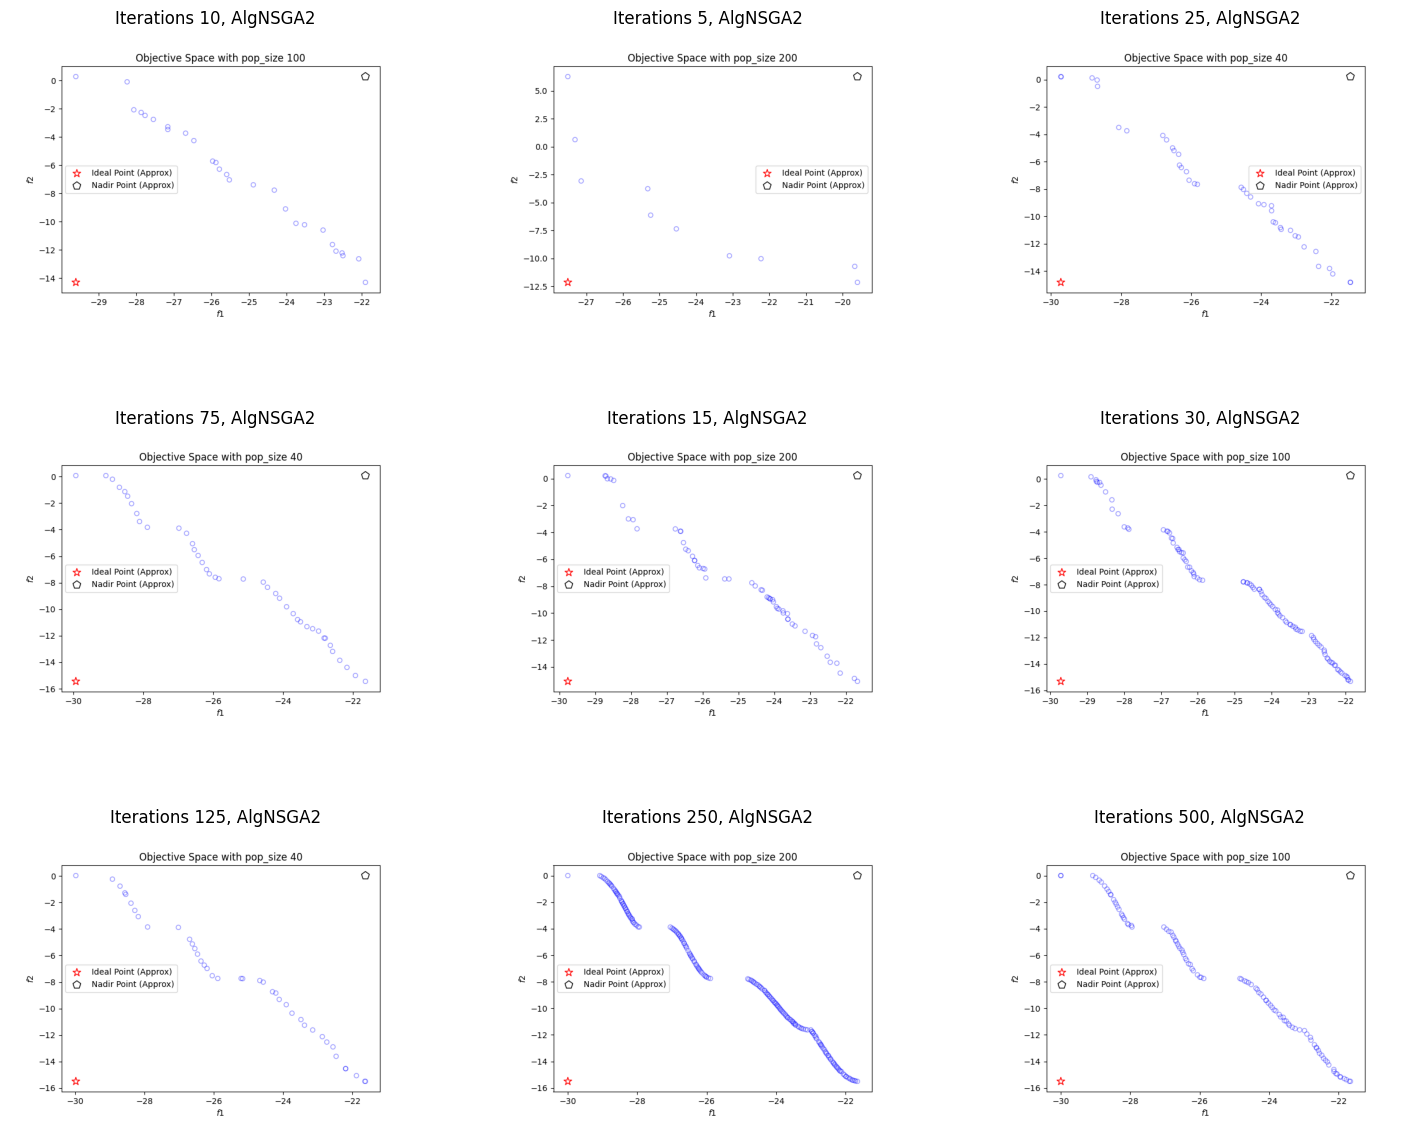

In [208]:
# more figures can be found here: Result/Images/KUR1/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(9):
    plt.subplot(3,3,i+1)
    f = kur1_4['image_location'][i]
    path = os.path.join(folder_2,f )+'.png'
    img = Image.open(path)
    plt.title(f'Iterations {kur1_4.Iteration[i]}, Alg{kur1_4.Alg_name[i]}')
    plt.axis('off')
    plt.imshow(img)

In [209]:
nadir_arr  = np.array([np.fromstring(i[1:-1], dtype=float, sep=' ') for i in np.array(kur1_4['approx_nadir'])])

print(f'Global nadir point for kur1 with two variables is :{np.round(np.max(nadir_arr, axis=0),2)}')

ref_point = np.array([-16 ,6])
pf = np.loadtxt(os.path.join(cdir, 'Bench/kur1_4_pf' ))
kur1_4_table = hv_result(kur1_4)

Global nadir point for kur1 with two variables is :[-16.66   6.26]
ref_point is [-16   6]


In [210]:
ref_point = np.array([-1, 5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/kur1_4_pf' ))
kur1_4_table_2 = hv_result(kur1_4)

ref_point is [-1  5]


In [211]:
pd.concat([kur1_4_table,kur1_4_table_2]).to_excel('Excel/kur1_4.xlsx', engine = 'xlsxwriter')

# Kur1 with five variables

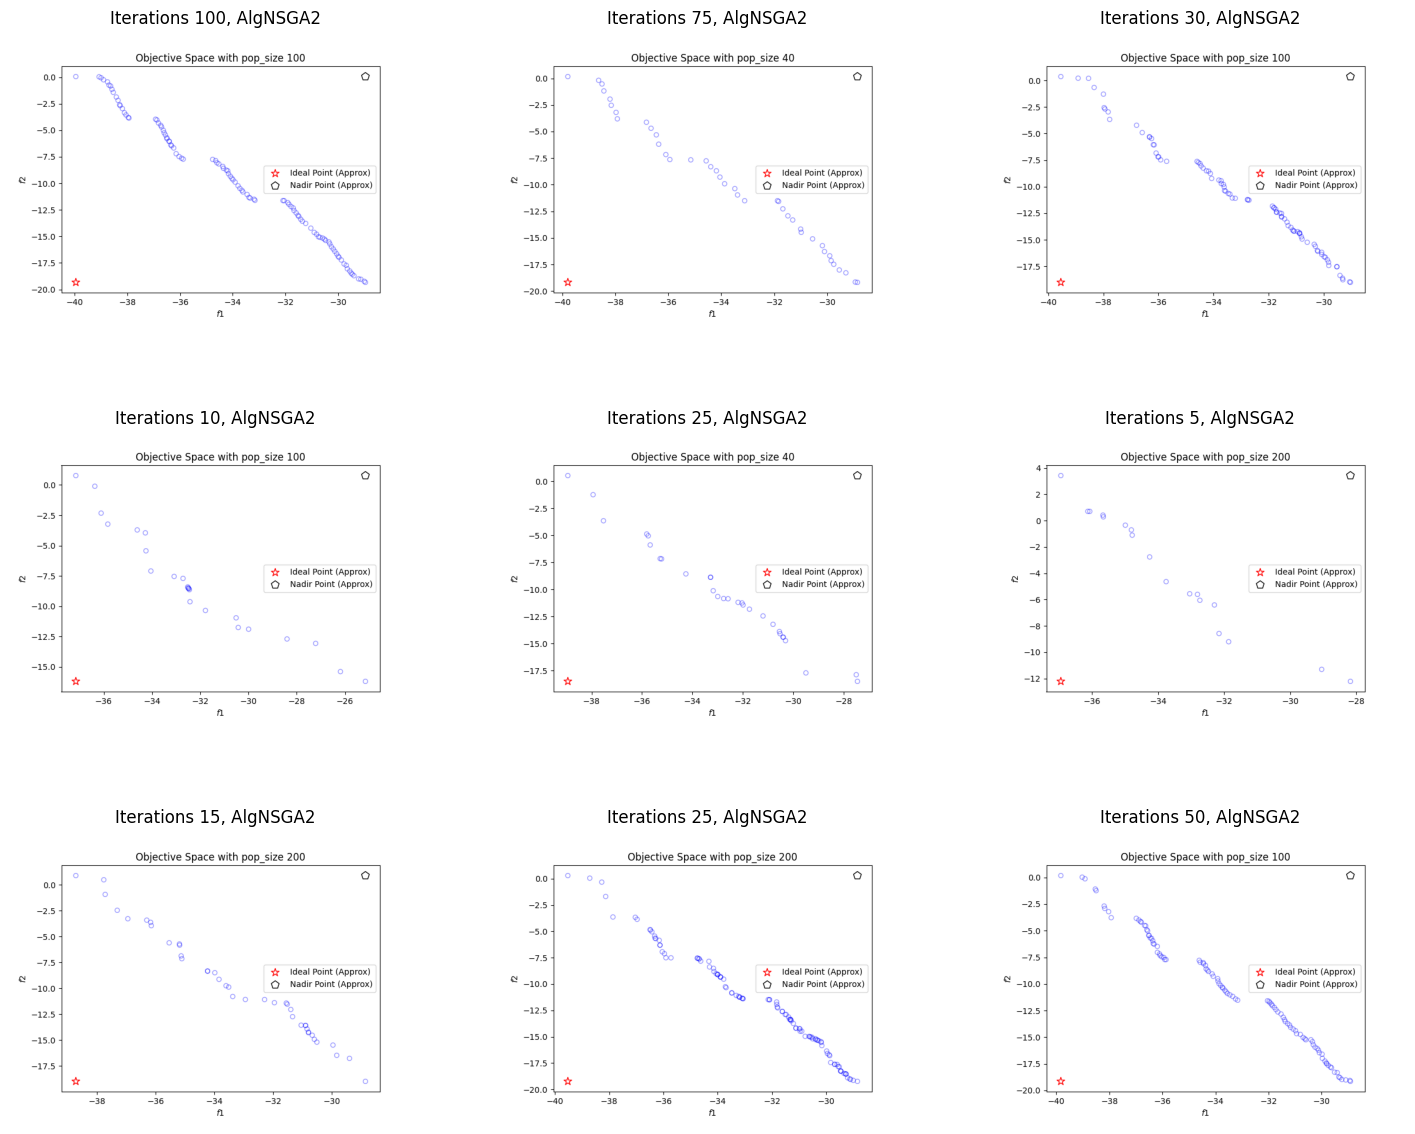

In [212]:
# more figures can be found here: Result/Images/KUR1/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(9):
    plt.subplot(3,3,i+1)
    f = kur1_5['image_location'][i]
    path = os.path.join(folder_2,f )+'.png'
    img = Image.open(path)
    plt.title(f'Iterations {kur1_5.Iteration[i]}, Alg{kur1_5.Alg_name[i]}')
    plt.axis('off')
    plt.imshow(img)

In [213]:
nadir_arr  = np.array([np.fromstring(i[1:-1], dtype=float, sep=' ') for i in np.array(kur1_5['approx_nadir'])])

print(f'Global nadir point for kur1 with two variables is :{np.round(np.max(nadir_arr, axis=0),2)}')

ref_point = np.array([-22,4])
pf = np.loadtxt(os.path.join(cdir, 'Bench/kur1_5_pf' ))
kur1_5_table = hv_result(kur1_5)

Global nadir point for kur1 with two variables is :[-22.45   3.84]
ref_point is [-22   4]


In [214]:
ref_point = np.array([-1, 5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/kur1_5_pf' ))
kur1_5_table_2 = hv_result(kur1_5)

ref_point is [-1  5]


In [215]:
pd.concat([kur1_5_table,kur1_5_table_2]).to_excel('Excel/kur1_5.xlsx', engine = 'xlsxwriter')